In [6]:
# Bibliotecas Gerais:

import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
#import plotly.graph_objects as go > err
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#import graphviz > err
#from graphviz import Source > err
from IPython.display import SVG
from tqdm import tqdm_notebook as tqdm

# ML:

from sklearn.linear_model import LogisticRegression
from sklearn import tree
#from sklearn.tree.export import export_text > err
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Métrica de Performance:

from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, roc_auc_score, roc_curve, precision_score, recall_score

In [7]:
#Carregando os dados:

data=pd.read_csv(r'C:\Users\felip\OneDrive\Área de Trabalho\MBA_DATA_SCIENCE_ANALYTICS\TCC\Final\Code\input\default of credit card clients.csv')

# Informações Gerais:

print(data.dtypes)

data.size

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_1        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
dpnm         int64
dtype: object


750000

In [8]:
# Data Prep:

# Droppa "ID":
data=data.drop(['ID'], axis=1)

#Remove Duplicatas:
data=data.drop_duplicates()

#Checa por nulos:
print(f"Existem {data.isna().any().sum()} células nulas no dataset.")

Existem 0 células nulas no dataset.


In [9]:
# Pré- Processamento:

# Separando colunas de atributos e classes:
X=data[data.columns[:-1]]
y=data['dpnm']

# Separando as bases de treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)
##### ALTERAAAAR O RANDOM_STATE PARA COMPARAR, FUNCIONA COMO SE FOSSE O SET.SEED do R.

# Normalização:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Modelagem:

# Rede Neural:

# Inicializando o classificador Perceptron Multi-camada:
mlp = MLPClassifier(hidden_layer_sizes=(1,1),max_iter=1000, random_state=25,shuffle=True, verbose=False)
##### ALTERAAAAR O RANDOM_STATE PARA COMPARAR, FUNCIONA COMO SE FOSSE O SET.SEED do R.

# Treinando o classificador:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(1, 1), max_iter=1000, random_state=25)

In [11]:
# Fazendo predições:.
mlp_pred = mlp.predict(X_test)

# CV Score:
mlp_cv=cross_val_score(mlp, X_train, y_train, cv=10).mean()

Accuracy: 0.812
Cross-validation accuracy: 0.811
Precision: 0.713
Recall: 0.252
F1 score: 0.373
specificity: 0.9712131596984236


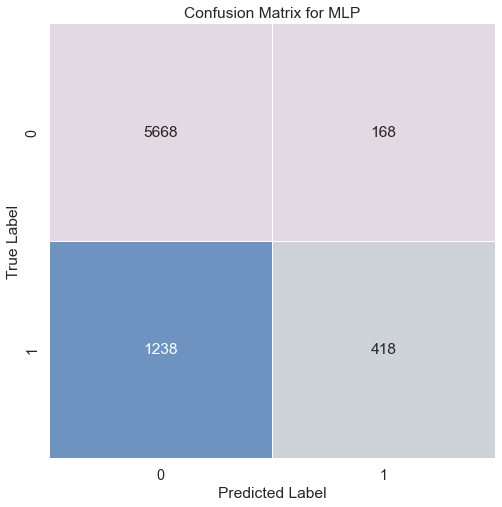

In [12]:
#Métricas de Performance:

# Accuracy: 1 is perfect prediction.
print('Accuracy: %.3f' % mlp.score(X_test, y_test))

# Cross-Validation accuracy
print('Cross-validation accuracy: %0.3f' % mlp_cv)

# Precision
print('Precision: %.3f' % precision_score(y_test, mlp_pred))

# Recall (Sensitividade)
print('Recall: %.3f' % recall_score(y_test, mlp_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, mlp_pred))

# Plota a matriz de confusão:
matrix = confusion_matrix(y_test,mlp_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for MLP');

#Especificidade:
specificity = matrix[0,0]/(matrix[0,1]+matrix[0,0])
print(f"specificity: {specificity}")

In [13]:
# Predizendo probabilidades à base de teste:
mlp_probs = mlp.predict_proba(X_test)

# Keep probabilities of the positive class only.
mlp_probs = mlp_probs[:, 1]

# Calculando o AUC:
auc_mlp = roc_auc_score(y_test, mlp_probs)
print('AUC: %.2f' % auc_mlp)

AUC: 0.72


In [14]:
# Grid Search para a Rede Neural:

# Hiperparâmetros a serem checados:
parameters = {'shuffle':[True],
              'verbose':[False],
              'random_state': [25],
              'max_iter':[1000],
              'hidden_layer_sizes':[(11,5),(12,6),(12,5,2),(3)]}

# Estimador de Árvore de Decisão:
default_mlp = MLPClassifier(random_state=42)

# Estimador GridSearchCV:.
gs_mlp = GridSearchCV(default_mlp, parameters, cv=10, n_jobs=-1,verbose=10)

# Treino o Estimador GridSeacrhCV para encontrador os melhores parâmetros:
gs_mlp.fit(X_train,y_train)

# Realiza predições com os melhores parâmetros:
gs_mlp_pred=gs_mlp.predict(X_test)

# Melhores valores de hiperparâmetros encontradas pelo Grid Search:
# Best parameters.
print("Best MLP Parameters: {}".format(gs_mlp.best_params_))

# Cross validation accuracy for the best parameters.
print('Cross-validation accuracy: %0.3f' % gs_mlp.best_score_)

# Accuracy: 1 is perfect prediction.
print('Accuracy: %0.3f' % (gs_mlp.score(X_test,y_test)))

# Precision
print('Precision: %.3f' % precision_score(y_test, gs_mlp_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, gs_mlp_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, gs_mlp_pred))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best MLP Parameters: {'hidden_layer_sizes': (12, 5, 2), 'max_iter': 1000, 'random_state': 25, 'shuffle': True, 'verbose': False}
Cross-validation accuracy: 0.820
Accuracy: 0.820
Precision: 0.674
Recall: 0.357
F1 score: 0.467


specificity: 0.950993831391364


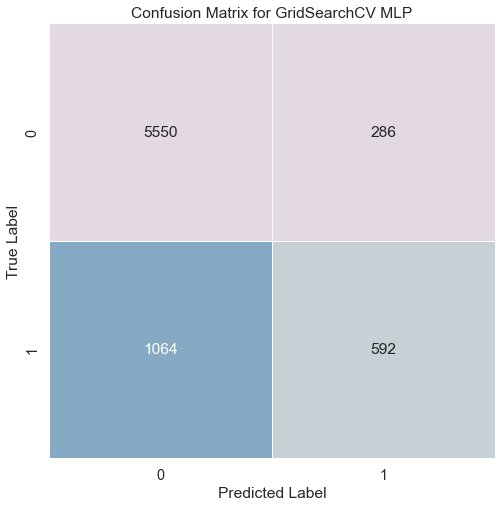

In [15]:
# Plota a matriz de confusão para o Percpetron Multi-Camada pós Grid Search:
matrix = confusion_matrix(y_test,gs_mlp_pred)
plt.figure(figsize=(8,8))
sns.heatmap(matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV MLP')

#Especificidade:
specificity = matrix[0,0]/(matrix[0,1]+matrix[0,0])
print(f"specificity: {specificity}")

In [16]:
# Prediz as probabilidades para a base de teste:
gs_mlp_probs = gs_mlp.predict_proba(X_test)

# Keep Probabilities of the positive class only.
gs_mlp_probs = gs_mlp_probs[:, 1]

# Compute the AUC Score.
gs_mlp_auc = roc_auc_score(y_test, gs_mlp_probs)
print('AUC: %.2f' % gs_mlp_auc)

AUC: 0.77


No handles with labels found to put in legend.


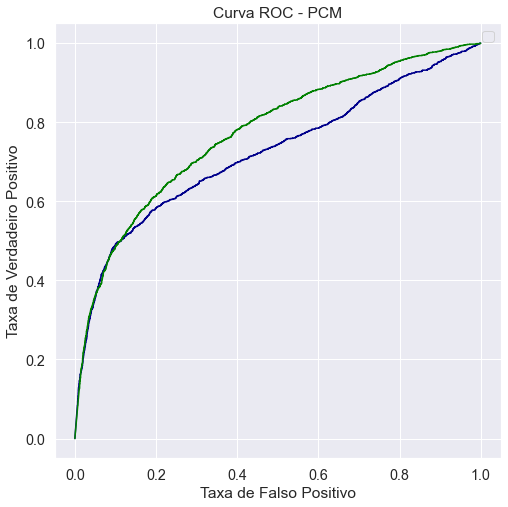

In [17]:
# Constrói a curva ROC:

gs_mlp_fpr, gs_mlp_tpr,gs_mlp_thresholds = roc_curve(y_test, gs_mlp_probs)
mlp_fpr, mlp_tpr, mlp_thresholds = roc_curve(y_test, mlp_probs)

# Plotta a curva ROC:
plt.figure(figsize=(8,8))
plt.plot(mlp_fpr, mlp_tpr, color='darkblue')
plt.plot(gs_mlp_fpr, gs_mlp_tpr, color='green')

#plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='random')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - PCM')
plt.legend()
plt.show()

In [18]:
#Resultados:

#Métricas de performance:
metrics=['Accuracy', 'CV accuracy', 'Precision','Recall','F1','ROC AUC']


d={
'': ['Neural Network (MLP)','GridSearchCV + Neural Network (MLP)'],
'Accuracy': [mlp.score(X_test, y_test),gs_mlp.score(X_test, y_test)],
'CV Accuracy': [mlp_cv,gs_mlp.best_score_], 
'Precision': [precision_score(y_test, mlp_pred),precision_score(y_test, gs_mlp_pred)],
'Recall': [recall_score(y_test, mlp_pred),recall_score(y_test, gs_mlp_pred)],
'F1': [f1_score(y_test, mlp_pred),f1_score(y_test, gs_mlp_pred)],
'ROC AUC': [auc_mlp, gs_mlp_auc]
}

results=pd.DataFrame(data=d).round(3).set_index('')
results

,Accuracy,CV Accuracy,Precision,Recall,F1,ROC AUC
,,,,,,
Neural Network (MLP),0.812,0.811,0.713,0.252,0.373,0.723
GridSearchCV + Neural Network (MLP),0.820,0.820,0.674,0.357,0.467,0.774
